In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# loading companies and rounds data into data frames

companies = pd.read_csv('companies.txt', sep = '\t', encoding = "ISO-8859-1")
companies.head()
companies.isnull().sum()
print(companies.shape)
print(companies.info())

(66368, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB
None


In [14]:
rounds2 = pd.read_csv('rounds2.csv', encoding = "ISO-8859-1")
rounds2.head()
rounds2.isnull().sum()
print(rounds2.shape)
print(rounds2.info())

(114949, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB
None


In [15]:

# unique companies present in rounds2 file

rounds2['company_permalink'] = rounds2['company_permalink'].str.title()
rounds2_unique = rounds2.drop_duplicates(subset= 'company_permalink', keep='first', inplace=False)
len(rounds2_unique.index)

66370

In [16]:
# unique companies present in companies file

companies.duplicated(subset= 'permalink', keep= False)
len(companies.permalink.index)

66368

In [17]:
# length of companies in rounds2 file which are not in companies file

len(set(rounds2.company_permalink).difference(set(companies.permalink)))

7

In [18]:
# Merging dataframes

master_frame = pd.merge(companies,rounds2, left_on = 'permalink', right_on = 'company_permalink', how = 'inner')
master_frame.head()
print(master_frame.shape)
print(master_frame.info())

(114942, 16)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 16 columns):
permalink                  114942 non-null object
name                       114941 non-null object
homepage_url               108810 non-null object
category_list              111535 non-null object
status                     114942 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94422 non-null object
company_permalink          114942 non-null object
funding_round_permalink    114942 non-null object
funding_round_type         114942 non-null object
funding_round_code         31139 non-null object
funded_at                  114942 non-null object
raised_amount_usd          94958 non-null float64
dtypes: float64(1), object(15)
memory usage: 14.9+ MB
None


In [19]:
# Identifying missing values

master_frame.isnull().sum()
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                   0.00
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [20]:
# Removing the columns not usefull in the analysis and also as the percentage of null values is more

master_frame = master_frame.drop('homepage_url', axis = 1)
master_frame = master_frame.drop('founded_at', axis = 1)
master_frame = master_frame.drop('funding_round_code', axis = 1)

In [21]:
master_frame.isnull().sum()

permalink                      0
name                           1
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd          19984
dtype: int64

In [22]:
# retaining the rows having <= 5 NaNs

master_frame = master_frame[master_frame.isnull().sum(axis=1) <= 5]
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                   0.00
name                        0.00
category_list               1.94
status                      0.00
country_code                6.57
state_code                  8.56
region                      7.88
city                        7.87
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          16.51
dtype: float64

In [23]:
# removing NaN rows in raised_amount_usd

master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                  0.00
name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
state_code                 8.01
region                     7.42
city                       7.42
company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [24]:
# removing Nan rows in Category_list & Name

master_frame = master_frame.dropna(subset=['name'])
master_frame = master_frame.dropna(subset=['category_list'])
master_frame = master_frame.dropna(subset=['country_code'])
master_frame = master_frame.dropna(subset=['state_code'])
master_frame = master_frame.dropna(subset=['region'])
master_frame = master_frame.dropna(subset=['city'])
#master_frame.info()
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
state_code                 0.0
region                     0.0
city                       0.0
company_permalink          0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

In [25]:
# Most representative value

master_frame_repval = master_frame.groupby('funding_round_type')
master_frame_repval.mean()/1000000
master_frame_repval['raised_amount_usd'].mean()/1000000

funding_round_type
angel                      0.977644
convertible_note           1.353095
debt_financing            16.559665
equity_crowdfunding        0.505437
grant                      4.607961
non_equity_assistance      0.488393
post_ipo_debt            170.448135
post_ipo_equity           64.414227
private_equity            70.828096
product_crowdfunding       1.357667
secondary_market          84.438532
seed                       0.742438
undisclosed               16.741537
venture                   11.742730
Name: raised_amount_usd, dtype: float64

In [26]:
# top 9 countries which have recieved the highest total funding

master_frame_invt_type = master_frame.loc[(master_frame['funding_round_type'] == 'venture')]
top9 = master_frame_invt_type.groupby(['country_code']).sum().sort_values('raised_amount_usd', ascending=False).head(9)
top9['Country']= ['United States','China','United Kingdom','India','Canada','France','Israel','Germany','Japan']
top9 = top9.reset_index()
top9

,country_code,raised_amount_usd,Country
0,USA,4.194432e+11,United States
1,CHN,3.695087e+10,China
2,GBR,1.923553e+10,United Kingdom
3,IND,1.416781e+10,India
4,CAN,9.435487e+09,Canada
5,FRA,6.825021e+09,France
6,ISR,6.551761e+09,Israel
7,DEU,6.180782e+09,Germany
8,JPN,3.018150e+09,Japan


In [27]:
# top three English-speaking countries in the data frame top9
# List of countries by English-speaking population from 
#https://en.wikipedia.org/wiki/List_of_countries_by_English-speaking_population
# downloaded table-1.csv file

countries = pd.read_csv('table-1.csv', encoding = "ISO-8859-1")

top9_countries = pd.merge(countries,top9, how = 'inner', on = 'Country')

top3_english_countries = top9_countries.set_index('Country').head(3)

top3_english_countries

,Eligible population,Total English speakers,Total English speakers (%),As first language,As first language (%),As an additional language[a],As an additional language (%),Comments,country_code,raised_amount_usd
Country,,,,,,,,,,
United States,"296,603,003","283,160,411",95.46,"234,171,556",79.00,"48,988,855",16.5,Figures are from the 2011-2015 American Commun...,USA,4.194432e+11
India,"1,028,737,436","125,344,737",12.18,"226,449",0.02,"125,118,287",12.16,Official language. 2001 Census figures for pop...,IND,1.416781e+10
United Kingdom,"64,000,000","59,600,000",97.74,"54,400,000",92.14,"5,128,000",5.60,[11] Additional English speaker figures are fo...,GBR,1.923553e+10


In [28]:
# reading mapping csv file as a dataframe


mapping = pd.read_csv('mapping.csv', encoding = "ISO-8859-1")
mapping.head()

mapping['main_sector'] = mapping.loc[:,'Automotive & Sports':'Social, Finance, Analytics, Advertising'].apply(np.argmax, axis = 1)

mapping = mapping.loc[:,['category_list','main_sector']]
mapping.head()

E:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


,category_list,main_sector
0,NaN,Blanks
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
4,Accounting,"Social, Finance, Analytics, Advertising"


In [29]:
# Extraction of primary sector of each category list from the category_list column

master_frame['category_list'] = master_frame['category_list'].str.split('|').str[0]
master_frame.head(8)

,permalink,name,category_list,status,country_code,state_code,region,city,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/Organization/-Fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,/Organization/-Fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
2,/Organization/-Qounter,:Qounter,Application Platforms,operating,USA,DE,DE - Other,Delaware City,/Organization/-Qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
4,/Organization/0-6-Com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,/Organization/0-6-Com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
7,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,/Organization/0Ndine-Biomedical-Inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0
8,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,/Organization/0Ndine-Biomedical-Inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0
9,/Organization/0Xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/Organization/0Xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,22-05-2013,3000000.0
10,/Organization/0Xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/Organization/0Xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
11,/Organization/0Xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/Organization/0Xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0


In [30]:
# Mapping primary sector with main_sector

master_frame = pd.merge(mapping, master_frame, how = 'inner', on = 'category_list')
master_frame

,category_list,main_sector,permalink,name,status,country_code,state_code,region,city,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,3D,Manufacturing,/Organization/3D-4U,3D-4U,operating,USA,WA,WA - Other,Pullman,/Organization/3D-4U,/funding-round/9c19884ec6bdaa0cf22d778bd036e903,debt_financing,14-10-2014,750000.0
1,3D,Manufacturing,/Organization/3D-Eye-Solutions,3D Eye Solutions,operating,USA,FL,Orlando,Longwood,/Organization/3D-Eye-Solutions,/funding-round/1dba01ed899110c0bbf5cbb8be2ec2b0,venture,11-08-2008,170000.0
2,3D,Manufacturing,/Organization/3D-Eye-Solutions,3D Eye Solutions,operating,USA,FL,Orlando,Longwood,/Organization/3D-Eye-Solutions,/funding-round/e8dc1a84754ccd42fe3147447ce1cbb9,venture,06-04-2010,210000.0
3,3D,Manufacturing,/Organization/3D-Industri-Es,3D Industri.es,operating,GBR,H9,London,London,/Organization/3D-Industri-Es,/funding-round/12b97a44d964d8f541e034208e34633e,seed,01-03-2012,350000.0
4,3D,Manufacturing,/Organization/3D-Industri-Es,3D Industri.es,operating,GBR,H9,London,London,/Organization/3D-Industri-Es,/funding-round/d79bd2f237f9e56334e7d8e77bf5e1f6,angel,01-03-2013,850000.0
5,3D,Manufacturing,/Organization/3D-Product-Imaging,3D Product Imaging,operating,USA,WA,Seattle,Seattle,/Organization/3D-Product-Imaging,/funding-round/156a827450c9f7a149654d2b6c912bd2,seed,01-01-2014,35000.0
6,3D,Manufacturing,/Organization/3D-Product-Imaging,3D Product Imaging,operating,USA,WA,Seattle,Seattle,/Organization/3D-Product-Imaging,/funding-round/50242b5ebb3c5ac80f811a5fa1faf1bd,convertible_note,15-05-2014,205000.0
7,3D,Manufacturing,/Organization/3Derm-Systems,3Derm Systems,operating,USA,CT,Hartford,New Haven,/Organization/3Derm-Systems,/funding-round/7326c512ede40425b1723f8712993c6f,debt_financing,23-07-2015,1155000.0
8,3D,Manufacturing,/Organization/3Derm-Systems,3Derm Systems,operating,USA,CT,Hartford,New Haven,/Organization/3Derm-Systems,/funding-round/8a42106d2ef3e2a37ded103beeb012e9,grant,29-10-2013,50000.0
9,3D,Manufacturing,/Organization/3Derm-Systems,3Derm Systems,operating,USA,CT,Hartford,New Haven,/Organization/3Derm-Systems,/funding-round/be86f90f81d370bc77642ea3f3fd50a7,venture,22-12-2014,675000.0


In [38]:
# Creation of three seperate dataframes
# At first creation of D1

D1 = master_frame.loc[(master_frame['country_code'] == 'USA') & (master_frame['funding_round_type'] == 'venture') & 
                      (master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000)]


D1['Investments_Count'] = D1.groupby('main_sector')['name'].transform('count')

D1['Amount_Count'] = D1.groupby('main_sector')['raised_amount_usd'].transform('sum')

D1[['Investments_Count','main_sector','name','raised_amount_usd','Amount_Count']]

sum(D1.groupby('main_sector')['Investments_Count'].count())  #for total number of investments accross all the category lists

sum(D1.groupby('main_sector')['raised_amount_usd'].sum())   #total amount of investments across all the category lists

D1['Investments_Count'].max()

D1.groupby('main_sector').max().sort_values('Investments_Count', ascending = False)

D1_company_name = D1.loc[(D1.main_sector == 'Others') | (D1.main_sector == 'Cleantech / Semiconductors') 
                         | (D1.main_sector == 'Social, Finance, Analytics, Advertising')]

    
D1_company_name.groupby(['name', 'main_sector']).sum().sort_values('raised_amount_usd', ascending = False)

E:\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,,raised_amount_usd,Investments_Count,Amount_Count
name,main_sector,,,
Biodesix,Cleantech / Semiconductors,75300000.0,18360,1.692988e+11
Tigo Energy,Cleantech / Semiconductors,68739496.0,18360,1.692988e+11
Virtustream,Others,64300000.0,17532,1.564637e+11
Intacct,"Social, Finance, Analytics, Advertising",61800000.0,9545,8.330348e+10
ForSight Labs,Cleantech / Semiconductors,61300001.0,16065,1.481365e+11
Lotame,"Social, Finance, Analytics, Advertising",59700000.0,9545,8.330348e+10
ChoiceStream,"Social, Finance, Analytics, Advertising",58300000.0,11454,9.996417e+10
Rheonix,Cleantech / Semiconductors,56124758.0,11475,1.058118e+11
SCIenergy,Cleantech / Semiconductors,55375423.0,13770,1.269741e+11


In [39]:
# Creation of D2 dataframe

D2 = master_frame.loc[(master_frame['country_code'] == 'IND') & (master_frame['funding_round_type'] == 'venture') & 
                      (master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000)]

D2['Investments_Count'] = D2.groupby('main_sector')['name'].transform('count')

D2['Amount_Count'] = D2.groupby('main_sector')['raised_amount_usd'].transform('sum')

D2[['Investments_Count','main_sector','name','raised_amount_usd','Amount_Count']]

sum(D2.groupby('main_sector')['Investments_Count'].count())  #for total number of investments accross all the category lists

sum(D2.groupby('main_sector')['raised_amount_usd'].sum())   #total amount of investments across all the category lists

D2['Investments_Count'].max()

D2.groupby('main_sector').max().sort_values('Investments_Count', ascending = False)

D2_company_name = D2.loc[(D2.main_sector == 'Others') | (D2.main_sector == 'News, Search and Messaging') 
                         | (D2.main_sector == 'Entertainment')]

    
D2_company_name.groupby(['name', 'main_sector']).sum().sort_values('raised_amount_usd', ascending = False)

E:\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,,raised_amount_usd,Investments_Count,Amount_Count
name,main_sector,,,
FirstCry.com,Others,39000000.0,327,3.022229e+09
Myntra,Others,38000000.0,436,4.029638e+09
GupShup,"News, Search and Messaging",33000000.0,156,1.301504e+09
CommonFloor,Others,32900000.0,327,3.022229e+09
Pepperfry.com,Others,28000000.0,327,3.022229e+09
ItzCash Card Ltd.,Others,25000000.0,218,2.014819e+09
IMImobile,"News, Search and Messaging",23000000.0,104,8.676691e+08
NxtGen Data Center & Cloud Services,Others,22300000.0,218,2.014819e+09
SMS GupShup,"News, Search and Messaging",22000000.0,104,8.676691e+08


In [40]:
# Creation of D3 dataframe

D3 = master_frame.loc[(master_frame['country_code'] == 'GBR') & (master_frame['funding_round_type'] == 'venture') & 
                      (master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000)]

D3['Investments_Count'] = D3.groupby('main_sector')['name'].transform('count')

D3['Amount_Count'] = D3.groupby('main_sector')['raised_amount_usd'].transform('sum')

D3[['Investments_Count','main_sector','name','raised_amount_usd','Amount_Count']]

sum(D3.groupby('main_sector')['Investments_Count'].count())  #for total number of investments accross all the category lists

sum(D3.groupby('main_sector')['raised_amount_usd'].sum())   #total amount of investments across all the category lists

D3['Investments_Count'].max()

D3.groupby('main_sector').max().sort_values('Investments_Count', ascending = False)

D3_company_name = D3.loc[(D3.main_sector == 'Others') | (D3.main_sector == 'Cleantech / Semiconductors') 
                         | (D3.main_sector == 'Social, Finance, Analytics, Advertising')]

    
D3_company_name.groupby(['name', 'main_sector']).sum().sort_values('raised_amount_usd', ascending = False)

E:\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,,raised_amount_usd,Investments_Count,Amount_Count
name,main_sector,,,
Celltick Technologies,"Social, Finance, Analytics, Advertising",37500000.0,380,3.205917e+09
Electric Cloud,Others,37000000.0,564,4.954956e+09
SenSage,Others,36250000.0,564,4.954956e+09
EUSA Pharma,Cleantech / Semiconductors,35600000.0,351,3.156939e+09
myThings,"Social, Finance, Analytics, Advertising",34000000.0,380,3.205917e+09
Enigmatec,Others,32500000.0,423,3.716217e+09
Horizon Discovery,Cleantech / Semiconductors,31353719.0,351,3.156939e+09
F-star Biotechnology Limited,Cleantech / Semiconductors,29132906.0,351,3.156939e+09
SilverRail Technologies,Others,29000000.0,423,3.716217e+09


E:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


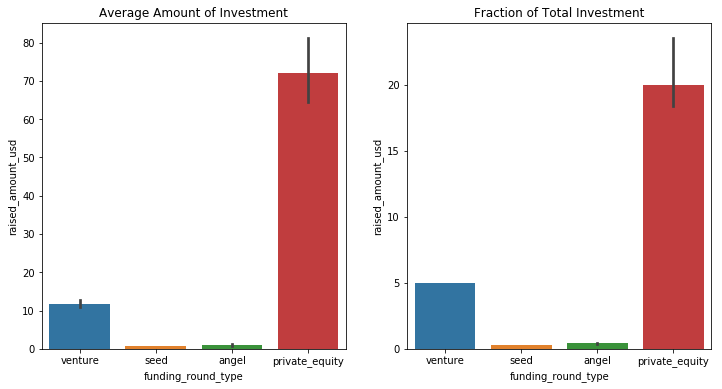

In [41]:
# Bar plot with mean of funding type

fund_type = master_frame.loc[(master_frame['funding_round_type'] == 'venture') | (master_frame['funding_round_type'] == 'angel')
                              | (master_frame['funding_round_type'] == 'seed') | (master_frame['funding_round_type'] == 'private_equity')]
fund_type['raised_amount_usd'] = fund_type['raised_amount_usd']/1000000

plt.figure(figsize=(12,6))

plt.subplot(1,2, 1)
sns.barplot(x = 'funding_round_type', y = 'raised_amount_usd', data = fund_type)
plt.title('Average Amount of Investment')

plt.subplot(1,2, 2)
sns.barplot(x = 'funding_round_type', y = 'raised_amount_usd', data = fund_type, estimator = np.median)
plt.title('Fraction of Total Investment')

plt.show()

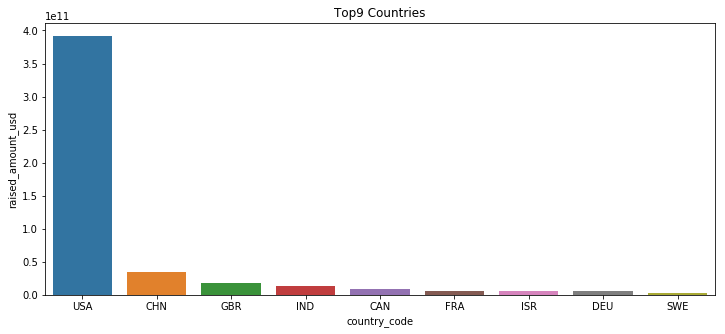

In [109]:
# Plotting top9 countries in terms of total investments
top9
plt.figure(figsize=(12,5))
sns.barplot(x = 'country_code', y = 'raised_amount_usd', data = top9)
plt.title('Top9 Countries')
plt.show()

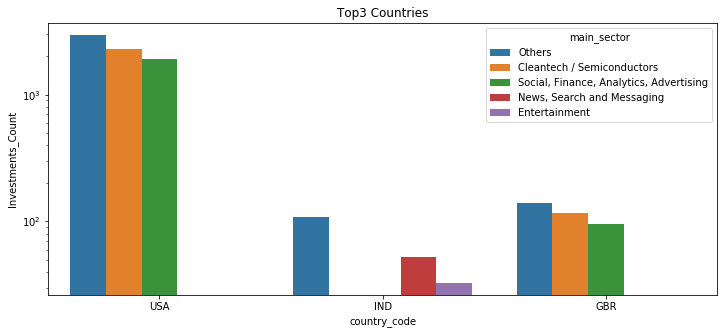

In [42]:
# Top3 countries

C1 = D1[['country_code','main_sector','Investments_Count']]
C1 = C1.loc[(C1.main_sector == 'Others') | (C1.main_sector == 'Cleantech / Semiconductors') 
            | (C1.main_sector == 'Social, Finance, Analytics, Advertising')]
C1 = C1.groupby('main_sector').max().sort_values('Investments_Count', ascending = False)

C1

C2 = D2[['country_code','main_sector','Investments_Count']]
C2 = C2.loc[(C2.main_sector == 'Others') | (C2.main_sector == 'News, Search and Messaging') 
            | (C2.main_sector == 'Entertainment')]
C2 = C2.groupby('main_sector').max().sort_values('Investments_Count', ascending = False)

C2

C3 = D3[['country_code','main_sector','Investments_Count']]
C3 = C3.loc[(C3.main_sector == 'Others') | (C3.main_sector == 'Cleantech / Semiconductors') 
            | (C3.main_sector == 'Social, Finance, Analytics, Advertising')]
C3 = C3.groupby('main_sector').max().sort_values('Investments_Count', ascending = False)

C3

C4 = pd.concat([C1, C2, C3])

C4 = C4.reset_index()

plt.figure(figsize=(12,5))
sns.barplot(x = 'country_code', y = 'Investments_Count', hue = 'main_sector', data = C4)
plt.title('Top3 Countries')
plt.yscale('log')
plt.show()